# EDA

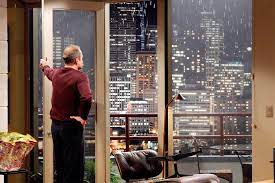

## Stakeholder
Our stakeholder is Zachary Brooks. He invested in historical houses in the best neighborhoods. He aims for high profits and wonders what the best time throughout the year is to sell his houses. Additionally he thinks about if renovations pay off.

In [111]:
import warnings
# filter warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plotly in vs code
import plotly.io as pio
pio.renderers.default = "notebook"

# setting up matplotlib
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (16, 8),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Data Cleaning
### Import the data
We work with the [King County Housing Data from kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv). We load the dataset and print the first five lines:

In [102]:
# Import data and check if importing worked
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


### Parsing the date
Apparently the date has a wrong format. Both yr_built and yr_renovated are ints but we will consider those later on. To facilitate working with it we parse it to datetime:

In [76]:
df.date = pd.to_datetime(df.date)

In [77]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


### Understanding the data - Columns
We examine the size of the dataset and find out what information it contains.

In [78]:
df.shape

(21613, 21)

We have 21613 rows and 21 columns in our dataset. What information is contained in the columns?

In [79]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

The **Column Names and descriptions for King County Data Set** as posted on kaggle:
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  # of bedrooms
* **bathroomsNumber** - # of bathrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

### Understanding the data - Datatypes and missing values

In [101]:
df.isna().sum().values

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
       20699,     0,     0,     0])

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

Looks good! We have no missing values and all data is parsed correctly.
* datetime for the date
* float for price, bathrooms, floors, lat and long. It makes sense: We can have half bathrooms and consequently half room counts. For the price and longitude and latitude we expect floats.
* int for the rest makes sense

### Understanding the data - Duplicates
Do we have duplicates in the dataset?

In [82]:
df["id"].duplicated().value_counts()

False    21436
True       177
Name: id, dtype: int64

Indeed we have 177 duplicates in the dataset. Those are probably houses that were resold in that short time period. Perhaps that could give insight if this is lucrative. We keep duplicates.

### Drop columns

Some columns are unnecessary to answer our hypothesis. Therefore we can drop some information. In detail, we neglect the following columns:
* zipcode: we use the coordinates to assign the areas
* room counts: we assume that our stakeholder wants to sell a standard house and we will not consider the influence on room count on the sale price
* footage lot: the correlation is very difficult and beyond the scope of this analysis
* floors and footage for each floor: same as room counts, not considered

In [83]:
columns_to_drop = ['zipcode', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'sqft_lot15']
df.drop(columns_to_drop, axis=1, inplace=True)

### Data statistics

In [100]:
df.describe()

,id,price,sqft_living,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,914.000,21613.000,21613.000,21613.000
mean,4580301520.865,540088.142,2079.900,0.008,0.234,3.409,7.657,1971.005,1995.827,47.560,-122.214,1986.552
std,2876565571.312,367127.196,918.441,0.087,0.766,0.651,1.175,29.373,15.517,0.139,0.141,685.391
min,1000102.000,75000.000,290.000,0.000,0.000,1.000,1.000,1900.000,1934.000,47.156,-122.519,399.000
25%,2123049194.000,321950.000,1427.000,0.000,0.000,3.000,7.000,1951.000,1987.000,47.471,-122.328,1490.000
50%,3904930410.000,450000.000,1910.000,0.000,0.000,3.000,7.000,1975.000,2000.000,47.572,-122.230,1840.000
75%,7308900445.000,645000.000,2550.000,0.000,0.000,4.000,8.000,1997.000,2007.000,47.678,-122.125,2360.000
max,9900000190.000,7700000.000,13540.000,1.000,4.000,5.000,13.000,2015.000,2015.000,47.778,-121.315,6210.000


**Correlation with sale price**

Now we look for correlation with sale price.

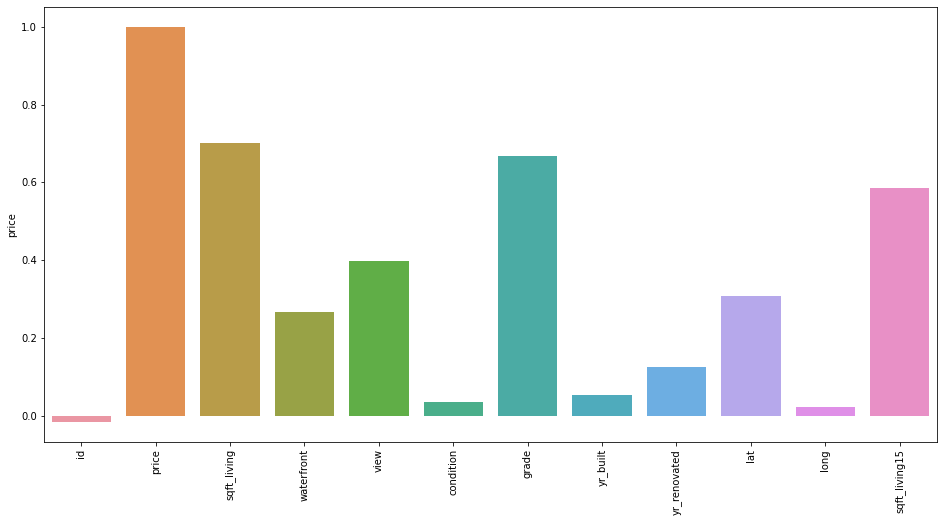

In [85]:
sns.barplot(df.corr().columns, df.corr()['price'])
plt.xticks(rotation=90);

So the price is correlated with the living area sqft_living, the grade but also the living area of the neighboring houses.

## Hypothesis generation



1. Sale prices vary over the year. There is a best time within a year when houses sale for more.
1. House prices depend on house age. Price decreases for older houses. Historical houses again increase in sale price.
1. Renovated houses sell for more. This effect is pronounced for historical houses.
1. High selling houses are clustered in a nice neighborhood. 

## Exploring the data
What is the distribution of our target? What are the distributions of the features? Do we have outliers?
### Sale price distribution
First we look on the distribution of the sale prices:

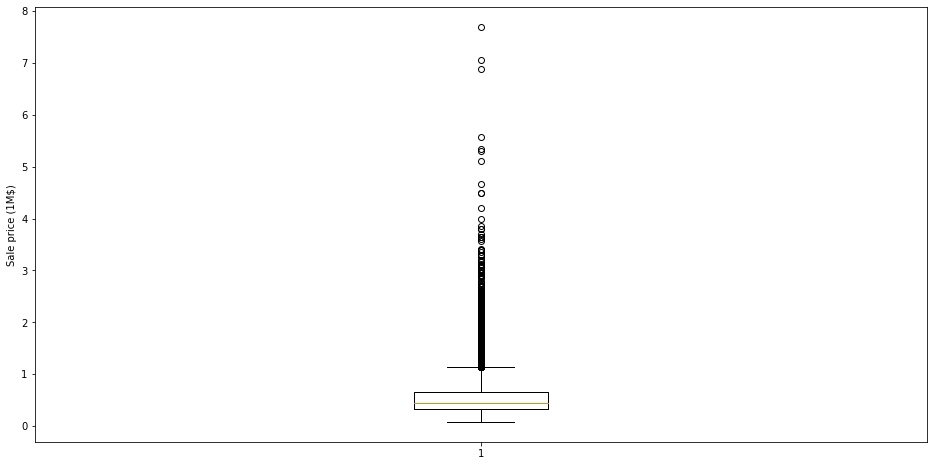

In [96]:
plt.boxplot(df.price/1e6)
plt.ylabel('Sale price (1M\$)');

We have most of our data between 0 and 1 million USD with some outliers up to around 8 million. To get a better idea of the main part of the data, we hide the outliers:

450000.0

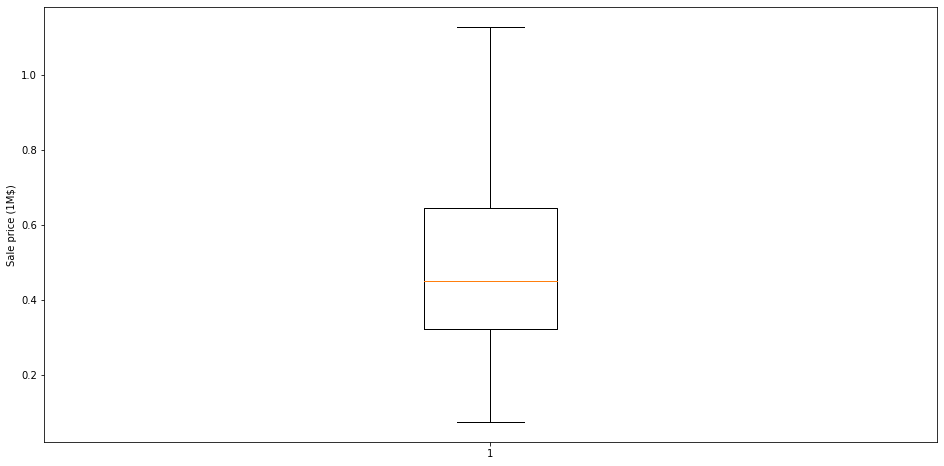

In [87]:
plt.boxplot(df.price/1e6,showfliers=False)
plt.ylabel('Sale price (1M\$)')
df.price.median()

The distribution is skewed right with most of the houses sold between 300k and 600k with the median at 450k. We have very few outliers with very high sale prices. In order to obtain a nice distribution, we remove the outliers.

In [99]:
df_ad = df[df.price <= df.price.quantile(q=0.95)]
df_ad.head()


#df.yr_renovated.replace(0, np.nan, inplace=True)
#df.yr_renovated = pd.to_datetime(df.yr_renovated)
#df.head()

,id,date,price,sqft_living,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15
0,7129300520,2014-10-13,221900.000,1180,0,0,3,7,1955,NaN,47.511,-122.257,1340
1,6414100192,2014-12-09,538000.000,2570,0,0,3,7,1951,1991.000,47.721,-122.319,1690
2,5631500400,2015-02-25,180000.000,770,0,0,3,6,1933,NaN,47.738,-122.233,2720
3,2487200875,2014-12-09,604000.000,1960,0,0,5,7,1965,NaN,47.521,-122.393,1360
4,1954400510,2015-02-18,510000.000,1680,0,0,3,8,1987,NaN,47.617,-122.045,1800


We look at the distributions of the features.

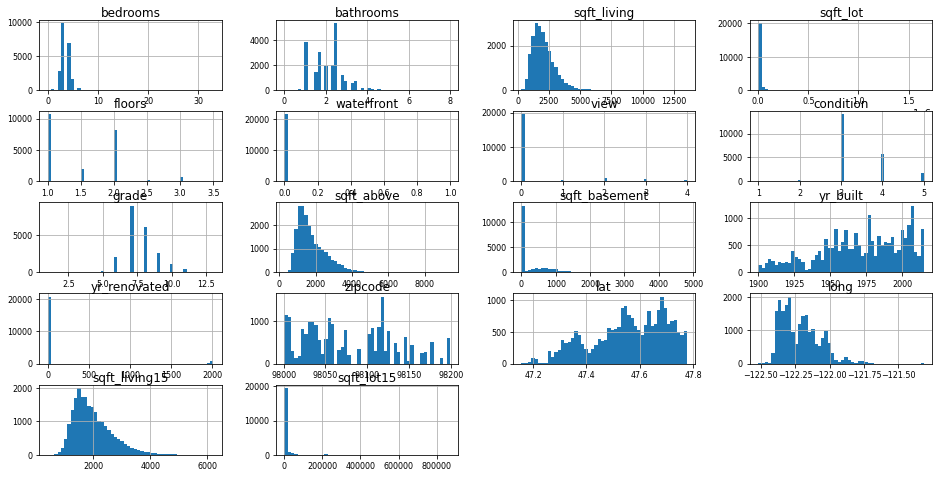

In [103]:
dist_cols = df.columns[3:]
df[dist_cols].hist(bins=50, xlabelsize=8, ylabelsize=8);

We observe a clear distinction between continuous and categorical variables:
* **continuous**
    * skewed right distribution as our target: sqft_living, sqft_above and sqft_living15
    * geographical data: three main peaks indicate, that a lot of houses are located in three geographical areas
* **categorical**
    * bedrooms are skewed right with mode at 3
    * bathrooms: a lot houses with 2.5 bathrooms
    * floors: mostly one and two
    * most houses have not waterfront and a bad view
    * grade: mode at 7
    * zipcode: irrelevant
    * yr_built: skewed left, relevant for us: historical houses (here: built before 1930?)
    * yr_renovated: skewed right. relevant for us: recent renovations (use after 2005?)

## Cleaning the data
We use a subset of historical houses and additionally renovated houses

In [90]:
df_hist_ad = df[(df.yr_built <= 1940) & (df.price <= df.price.quantile(q=0.95))]
df_ad = df[(df.price <= df.price.quantile(q=0.95))]

In [91]:
df_hist = df[df.yr_built <= 1940]
df_hist

,id,date,price,sqft_living,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15
2,5631500400,2015-02-25,180000.000,770,0,0,3,6,1933,0,47.738,-122.233,2720
12,114101516,2014-05-28,310000.000,1430,0,0,4,7,1927,0,47.756,-122.229,1780
14,1175000570,2015-03-12,530000.000,1810,0,0,3,7,1900,0,47.670,-122.394,1360
17,6865200140,2014-05-29,485000.000,1600,0,0,4,7,1916,0,47.665,-122.343,1610
18,16000397,2014-12-05,189000.000,1200,0,0,4,7,1921,0,47.309,-122.210,1060
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20779,6300000226,2014-06-26,240000.000,1200,0,0,3,7,1933,0,47.708,-122.342,1130
20780,6300000226,2015-05-04,380000.000,1200,0,0,3,7,1933,0,47.708,-122.342,1130
21043,9276200220,2014-07-17,375000.000,720,0,0,3,6,1920,0,47.581,-122.389,1140
21240,7174800094,2015-04-20,525000.000,1030,0,0,3,8,1940,0,47.665,-122.305,2650


<AxesSubplot:xlabel='yr_built', ylabel='price'>

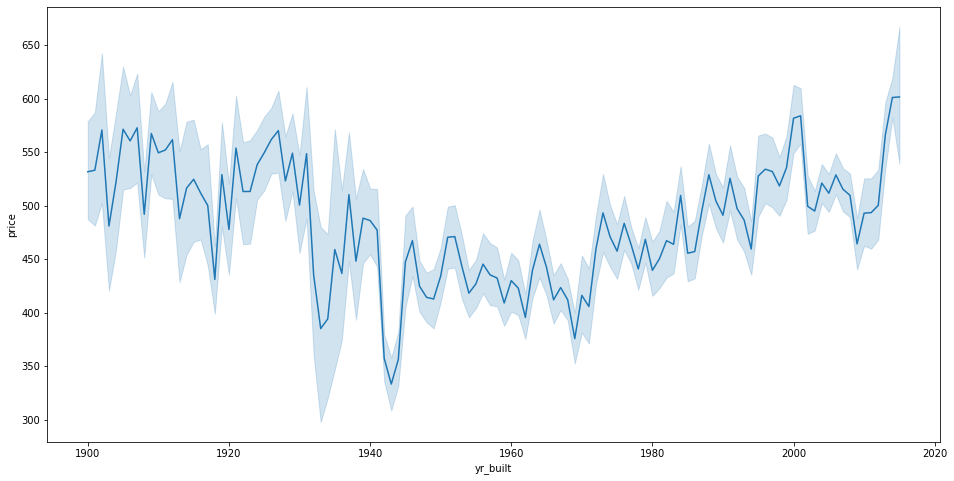

In [105]:
sns.lineplot(df_ad.yr_built,df_ad.price/1e3)

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

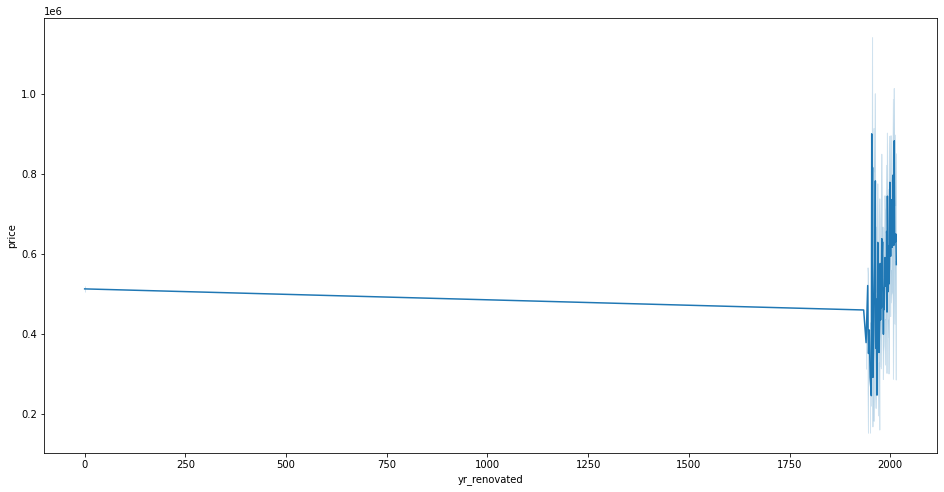

In [104]:
sns.lineplot(df_hist_ad.yr_renovated, df_hist_ad.price)

In [94]:
df_hist_ad.corr()['price']

id               0.055
price            1.000
sqft_living      0.621
waterfront       0.048
view             0.196
condition        0.186
grade            0.708
yr_built        -0.065
yr_renovated     0.107
lat              0.423
long            -0.268
sqft_living15    0.509
Name: price, dtype: float64

In [95]:
df.yr_renovated.replace(0, np.nan, inplace=True)
#df.yr_renovated = pd.to_datetime(df.yr_renovated)
df.head()

,id,date,price,sqft_living,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15
0,7129300520,2014-10-13,221900.000,1180,0,0,3,7,1955,NaN,47.511,-122.257,1340
1,6414100192,2014-12-09,538000.000,2570,0,0,3,7,1951,1991.000,47.721,-122.319,1690
2,5631500400,2015-02-25,180000.000,770,0,0,3,6,1933,NaN,47.738,-122.233,2720
3,2487200875,2014-12-09,604000.000,1960,0,0,5,7,1965,NaN,47.521,-122.393,1360
4,1954400510,2015-02-18,510000.000,1680,0,0,3,8,1987,NaN,47.617,-122.045,1800


In [121]:
df_ad['age'] = 2016 - df_ad.yr_built
df_ad['age_ren'] = df_ad.age
df_ad.age_ren[df_ad.age_ren != 0] = 2016 - df_ad.yr_renovated
df_ad['price_log'] = np.log(df_ad.price)
df_ad.head()

,id,date,price,sqft_living,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15,age,age_ren,price_log
0,7129300520,2014-10-13,221900.000,1180,0,0,3,7,1955,NaN,47.511,-122.257,1340,61,NaN,12.310
1,6414100192,2014-12-09,538000.000,2570,0,0,3,7,1951,1991.000,47.721,-122.319,1690,65,25.000,13.196
2,5631500400,2015-02-25,180000.000,770,0,0,3,6,1933,NaN,47.738,-122.233,2720,83,NaN,12.101
3,2487200875,2014-12-09,604000.000,1960,0,0,5,7,1965,NaN,47.521,-122.393,1360,51,NaN,13.311
4,1954400510,2015-02-18,510000.000,1680,0,0,3,8,1987,NaN,47.617,-122.045,1800,29,NaN,13.142


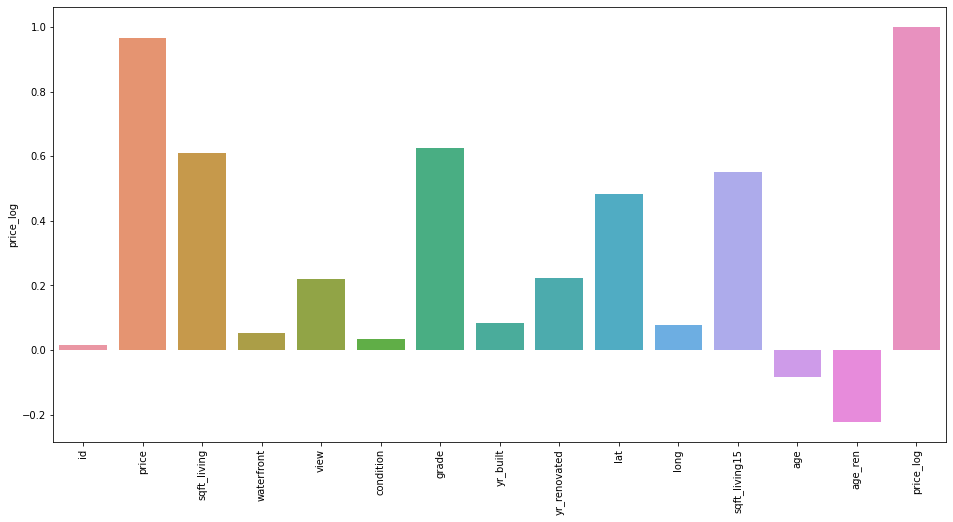

In [122]:
sns.barplot(df_ad.corr().columns, df_ad.corr()['price_log'])
plt.xticks(rotation=90);